<a href="https://colab.research.google.com/github/tlchampion/drybeans/blob/main/notebooks/db_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install feature-engine

!pip uninstall xgboost -y
!pip install -U xgboost

# !pip uninstall scikit-learn -y
# !pip install -U scikit-learn

!pip install dython
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 260 kB 7.1 MB/s 
     |████████████████████████████████| 9.8 MB 38.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Successfully uninstalled xgboost-0.90
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 60 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 385 kB/s 
     |████████████████████████████████| 11.2 MB 43.3 MB/s 
     |████████████████████████████████| 930 kB 49.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 462 kB/s 


In [1]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 183 kB 8.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=5510f8f38824e85196b63242f5e949e4f78b1780ea551135775da6ef9388c41a
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=49e300620d467365d2c9a10aca71509e92da268b09ba3e3e3efbd80bc7bf11b8
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [2]:
!pip install seaborn_qqplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn

from scipy.stats import chi2_contingency

from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import SmartCorrelatedSelection
from dython import nominal
from feature_engine.encoding import OrdinalEncoder as oe, MeanEncoder, CountFrequencyEncoder, RareLabelEncoder, OneHotEncoder as ohe
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.creation import CombineWithReferenceFeature
from feature_engine.outliers import ArbitraryOutlierCapper
import seaborn as sns
import math

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import os
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from joblib import dump, load
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, explained_variance_score, r2_score, mean_squared_error
from skopt import BayesSearchCV
import xgboost as xgb
from skopt.space import Real, Categorical, Integer, Space
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import shapiro



In [4]:
from statsmodels.graphics.gofplots import qqplot
from seaborn_qqplot import pplot
from scipy.stats import normaltest
from scipy.stats import levene
from scipy.stats import bartlett
import pingouin as pg

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer

In [5]:
basedir = '/content/drive/MyDrive/Projects/drybeans'
try:
    os.makedirs(os.path.join(basedir, "data/02_interim"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "data/03_processed"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "models"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "models/model1"))
except FileExistsError:
    # directory already exists
    pass




In [6]:
datapath = os.path.join(basedir, "data/01_raw/Dry_Bean_Dataset.xlsx") 
data = pd.read_excel(datapath, engine='openpyxl')


# Prepare Train and Test sets
Prior to conducting any EDA we will split the dataset into train and test. EDA will only be performed on the train set in order to keep any accidental data leakage from impacting future decisions.





In [7]:
x = data.iloc[:,0:16]
y = data.iloc[:,16]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y )

## Verify shapes for newly created data sets

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10888, 16) (2723, 16) (10888,) (2723,)


# EDA

## Basic Descriptive Analysis

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [11]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10888.0,53018.072649,29288.343624,20420.000000,36324.000000,44665.000000,61360.500000,248424.000000
Perimeter,10888.0,855.023615,214.080717,524.736000,703.540250,795.059500,976.934750,1895.940000
MajorAxisLength,10888.0,320.047972,85.605004,183.601165,253.262149,297.130577,376.044012,726.373493
MinorAxisLength,10888.0,202.221553,44.968819,122.512653,175.715645,192.434802,216.772173,460.198497
AspectRation,10888.0,1.583165,0.246737,1.024868,1.433010,1.550842,1.706007,2.430306
Eccentricity,10888.0,0.750893,0.091890,0.218951,0.716262,0.764342,0.810192,0.911423
ConvexArea,10888.0,53737.747979,29734.530320,20684.000000,36708.250000,45208.500000,62372.750000,251082.000000
EquivDiameter,10888.0,252.995778,59.145280,161.243764,215.056163,238.472733,279.511385,562.408446
Extent,10888.0,0.749438,0.049045,0.555315,0.718305,0.759339,0.786510,0.866195
Solidity,10888.0,0.987131,0.004693,0.919246,0.985666,0.988272,0.990011,0.994677


## Histograms of Independent Variables

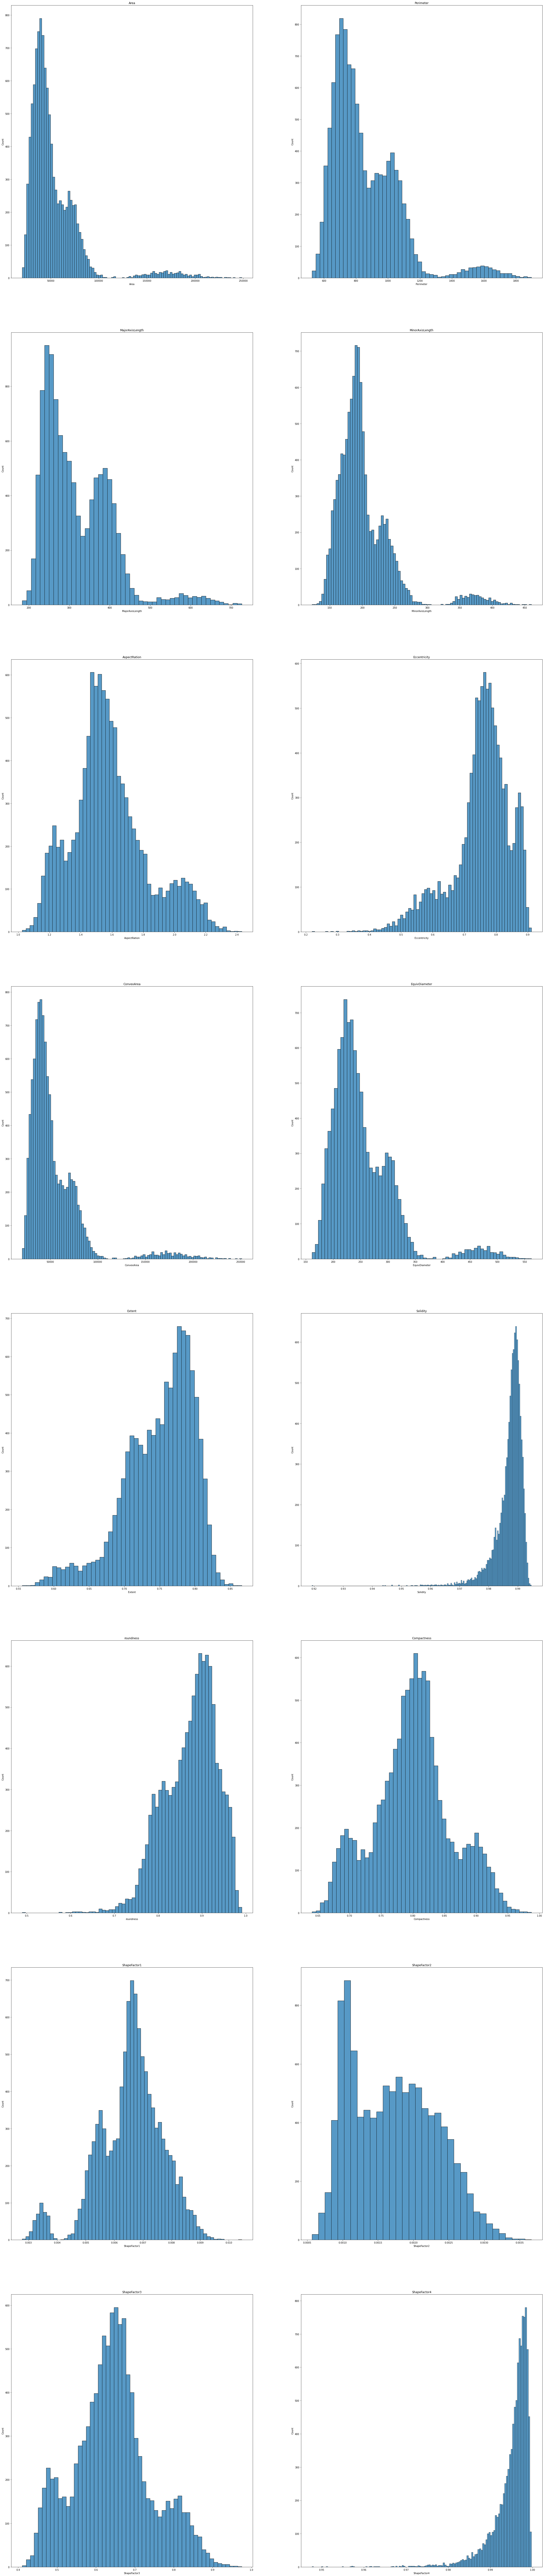

In [12]:
cols = X_train.columns
fig = plt.figure(figsize=(40,400))
for i in range (1,len(cols)+1):
    ax = plt.subplot(math.ceil(len(cols)),2,i)
    sns.histplot(x=X_train[cols[i-1]])
    plt.title(cols[i-1])
   
plt.show()

## Boxplots for Independent Variables Grouped by Target Variable

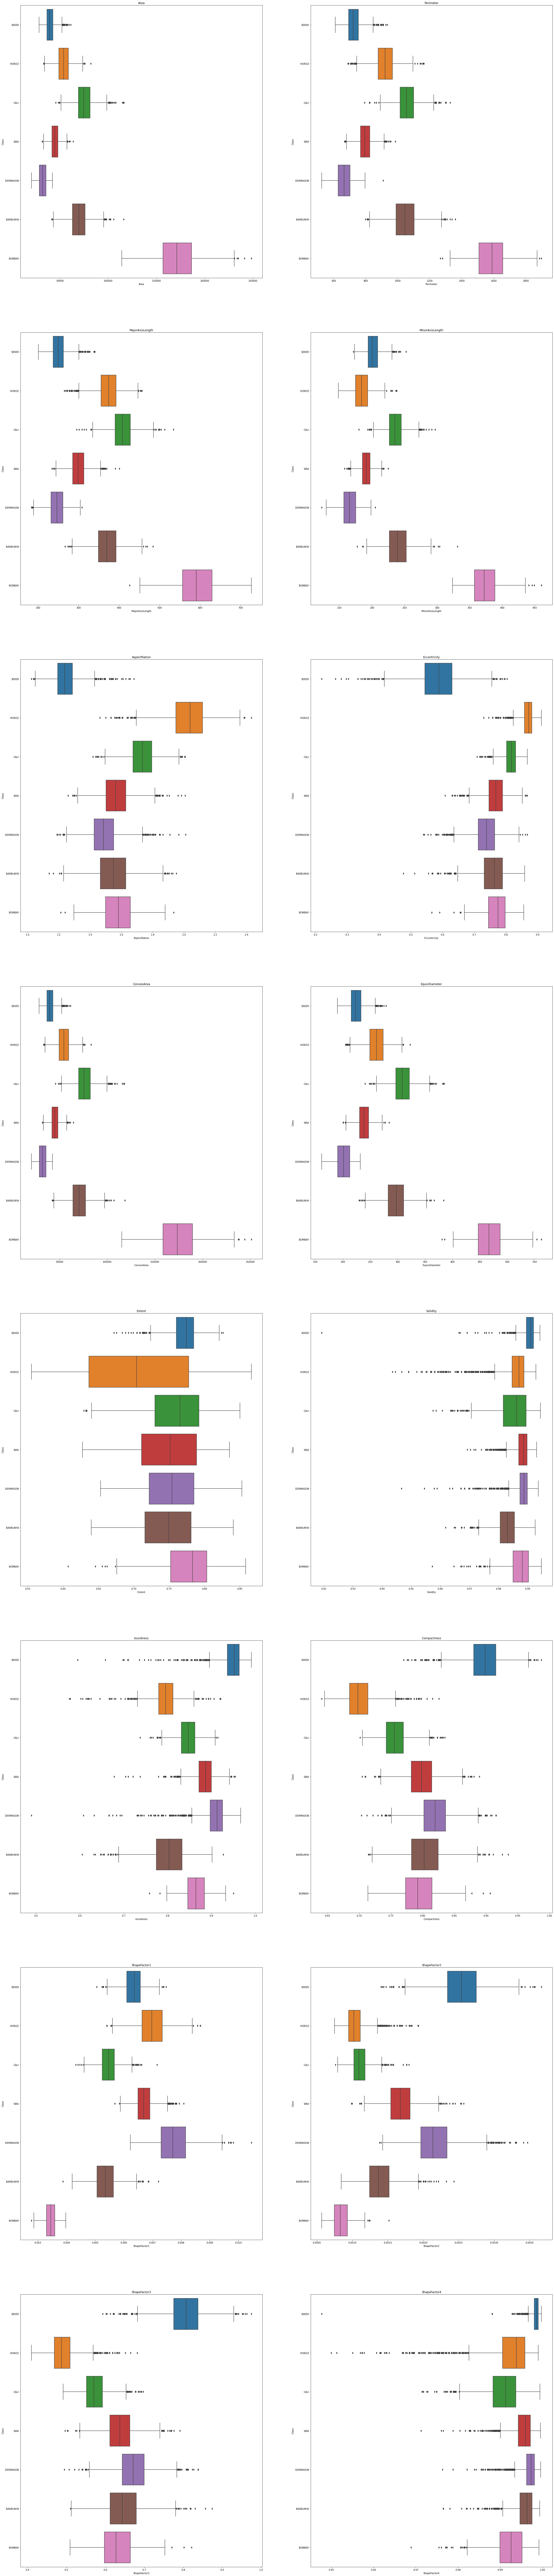

In [13]:
fig = plt.figure(figsize=(40,400))
for i in range (1,len(cols)+1):
    ax = plt.subplot(math.ceil(len(cols)),2,i)
    sns.boxplot(x=X_train[cols[i-1]], y=y_train)
    plt.title(cols[i-1])
plt.show()

## Correlation Heatmap for Independent Variables

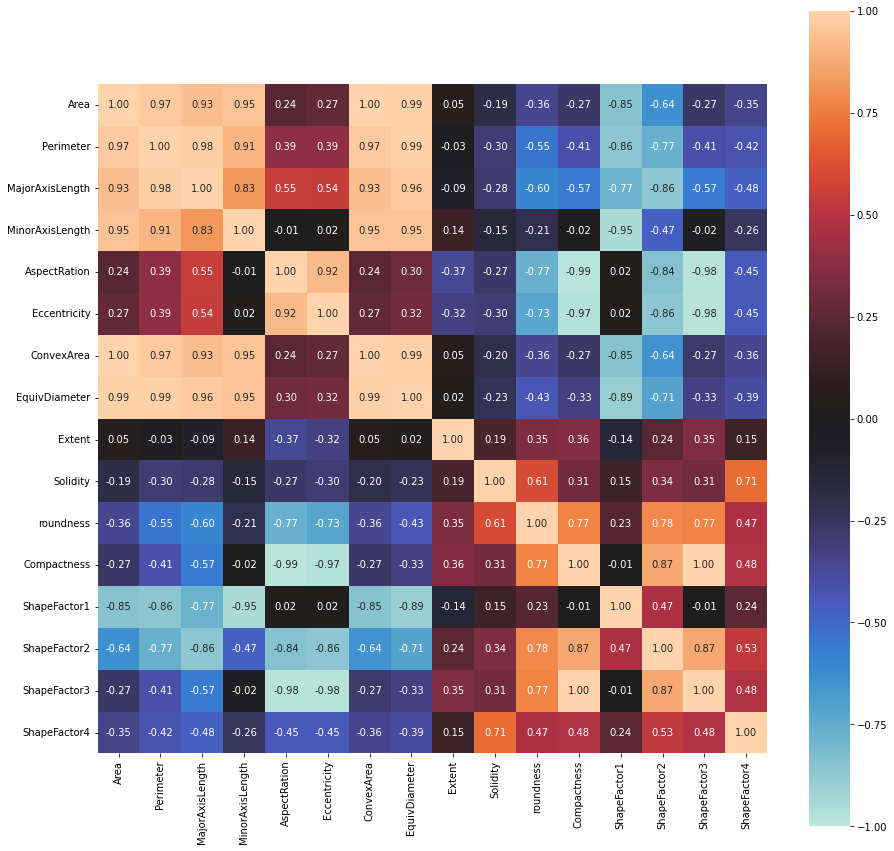

In [14]:
nominal.associations(X_train, figsize=(15,15));

## Variance of Independent Variables

In [15]:
X_test.var()

Area               8.685815e+08
Perimeter          4.629364e+04
MajorAxisLength    7.407117e+03
MinorAxisLength    2.023461e+03
AspectRation       6.075781e-02
Eccentricity       8.549595e-03
ConvexArea         8.964652e+08
EquivDiameter      3.518192e+03
Extent             2.424850e-03
Solidity           2.051998e-05
roundness          3.534346e-03
Compactness        3.820599e-03
ShapeFactor1       1.278974e-06
ShapeFactor2       3.529414e-07
ShapeFactor3       9.847845e-03
ShapeFactor4       1.846269e-05
dtype: float64

## Distrtibution of Target Variable

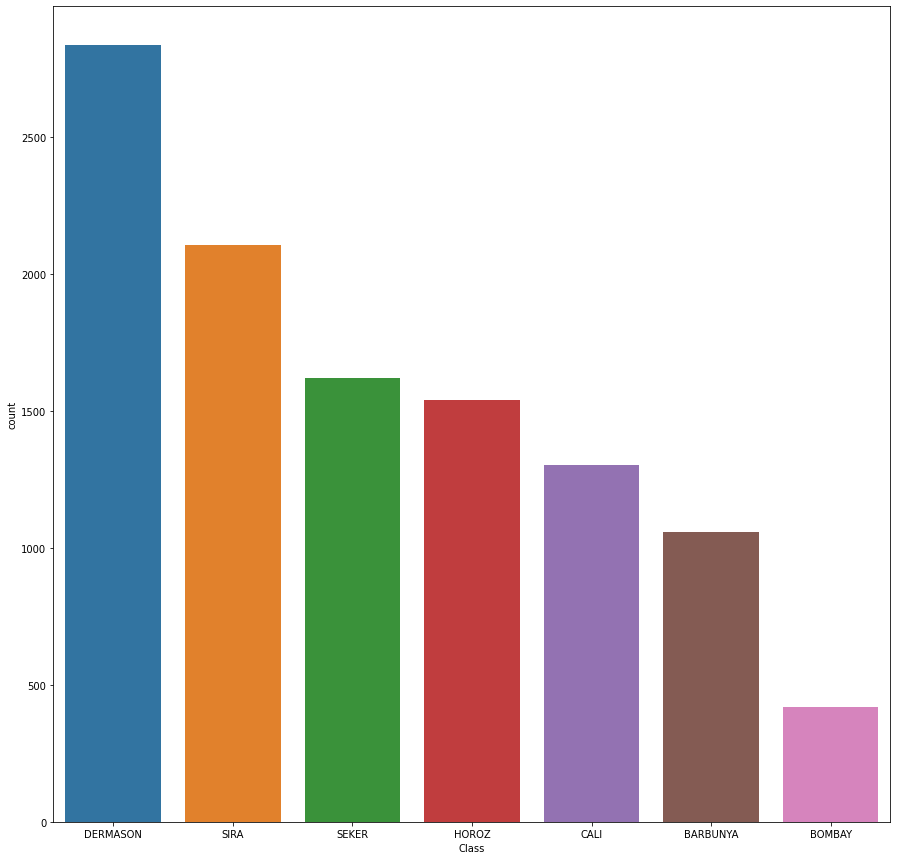

In [16]:
fig = plt.figure(figsize=(15,15))
sns.countplot(x=y_train,order = y_train.value_counts().index);

## Normality Tests for Independent Variables

### Q-Q Plots

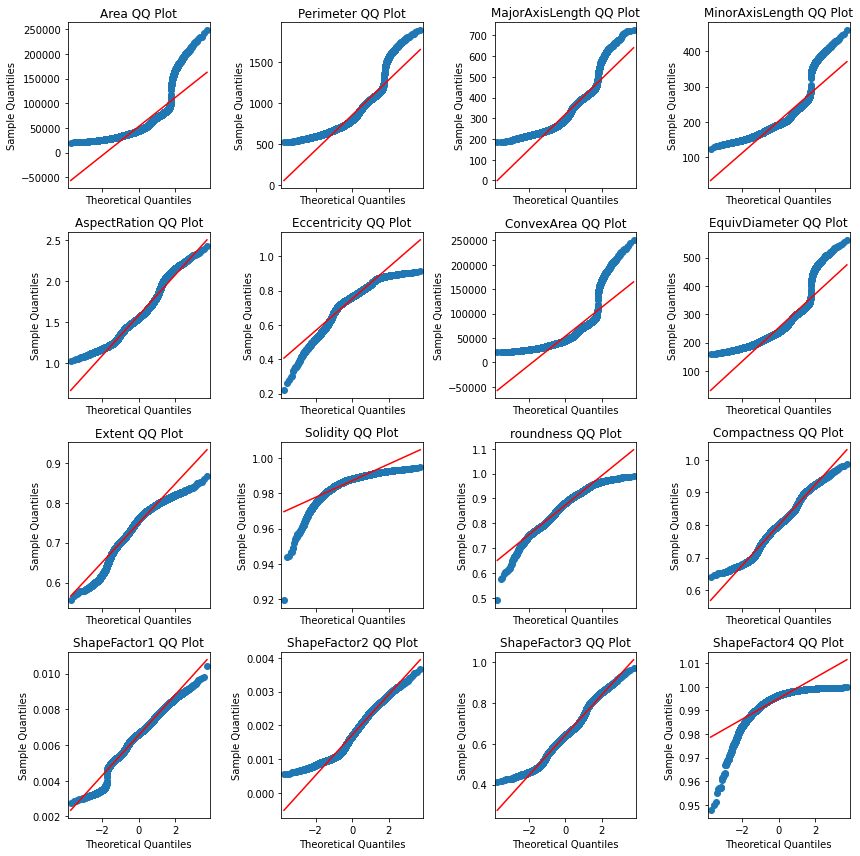

In [17]:
fig, axes = plt.subplots(ncols=4, nrows=4, sharex=True, figsize=(4*3, 4*3))
for k, ax in zip(X_train.columns, np.ravel(axes)):
    sm.qqplot(X_train[k], line='s', ax=ax)
    ax.set_title(f'{k} QQ Plot')
plt.tight_layout()

### D’Agostino’s $K^2$ Test

In [18]:
stat,p = normaltest(X_train)

In [19]:
data = list(zip(stat,p))

In [20]:
results = pd.DataFrame(data, columns=['statistic', 'p-value'], index=X_train.columns)
results['Gaussian?'] = results['p-value'] > 0.5

In [21]:
results

,statistic,p-value,Gaussian?
Area,6790.572851,0.000000e+00,False
Perimeter,3403.737373,0.000000e+00,False
MajorAxisLength,2604.610448,0.000000e+00,False
MinorAxisLength,5137.968209,0.000000e+00,False
AspectRation,546.873576,1.769749e-119,False
Eccentricity,1738.779319,0.000000e+00,False
ConvexArea,6762.703440,0.000000e+00,False
EquivDiameter,4343.991293,0.000000e+00,False
Extent,1196.374057,1.624330e-260,False
Solidity,6523.224008,0.000000e+00,False


## ANOVA Between Independent and Target Variables

### Verify Equal Variance Assumption

#### Levene Test

In [22]:
pvalues = []
stats = []
for i in X_train.columns:
    g1 = X_train[i][y_train == 'SIRA']
    g2 = X_train[i][y_train == 'BOMBAY']
    g3 = X_train[i][y_train == 'BARBUNYA']
    g4 = X_train[i][y_train == 'CALI']
    g5 = X_train[i][y_train == 'HOROZ']
    g6 = X_train[i][y_train == 'SEKER']
    g7 = X_train[i][y_train == 'DERMASON']
    stat,pvalue = levene(g1,g2,g3,g4,g5,g6,g7)
    pvalues.append(pvalue)
    stats.append(stat)

results = pd.DataFrame(list(zip(stats,pvalues)), columns=['Statistics', 'p-value'], index=X_train.columns)

In [23]:
results

,Statistics,p-value
Area,687.361485,0.000000e+00
Perimeter,227.829362,4.464892e-275
MajorAxisLength,225.292669,3.794490e-272
MinorAxisLength,203.698776,4.569748e-247
AspectRation,84.060723,2.557993e-103
Eccentricity,344.562161,0.000000e+00
ConvexArea,693.027875,0.000000e+00
EquivDiameter,182.314839,5.676193e-222
Extent,676.665259,0.000000e+00
Solidity,168.407806,1.633234e-205


#### Visual Comparison of Calculated Variances by Target Group

In [24]:
full_train = X_train

In [25]:
full_train['target'] = y_train

In [26]:
full_train.groupby('target').var().T

target,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
Area,1.063739e+08,5.151207e+08,8.959326e+07,2.176761e+07,5.471033e+07,2.291731e+07,2.077723e+07
Perimeter,7.926902e+03,1.257210e+04,4.646273e+03,2.566488e+03,4.945116e+03,2.307966e+03,1.987708e+03
MajorAxisLength,1.046169e+03,2.678337e+03,8.903524e+02,4.288848e+02,9.191378e+02,4.015646e+02,4.360979e+02
MinorAxisLength,3.923617e+02,5.319591e+02,2.160628e+02,1.561997e+02,1.849554e+02,1.197482e+02,8.309865e+01
AspectRation,1.573305e-02,1.383966e-02,8.379959e-03,9.351690e-03,1.833678e-02,6.827607e-03,9.328002e-03
Eccentricity,2.437328e-03,1.654645e-03,5.085183e-04,1.632812e-03,4.513690e-04,5.096306e-03,1.072824e-03
ConvexArea,1.100732e+08,5.349200e+08,9.233202e+07,2.209901e+07,5.638452e+07,2.333744e+07,2.123558e+07
EquivDiameter,4.872299e+02,9.362371e+02,3.725716e+02,2.178947e+02,3.310561e+02,1.773098e+02,1.480364e+02
Extent,1.623048e-03,1.509486e-03,1.758261e-03,1.394091e-03,5.614550e-03,3.541842e-04,1.969785e-03
Solidity,1.627200e-05,2.501380e-05,3.276777e-05,9.221407e-06,3.874574e-05,9.434125e-06,7.378055e-06


### Welch Test
Since our variables do not show equal variance we will perform a Welch ANOVA test to determine if there is a difference in the mean value for the independent variables between the groups of the target variable.

In [27]:
column_names = X_train.columns.values.tolist()
results = pd.DataFrame()

for i in range(0,16):
    result = full_train.welch_anova(dv=column_names[i], between='target')
    result['variable'] = column_names[i]
    # results = results.append(full_train.welch_anova(dv=column_names[i], between='target'))
    results = results.append(result)






In [28]:
results.set_index('variable')

,Source,ddof1,ddof2,F,p-unc,np2
variable,,,,,,
Area,target,6,3008.174295,9255.681523,0.000000e+00,0.928167
Perimeter,target,6,3054.720788,12483.408717,0.000000e+00,0.914831
MajorAxisLength,target,6,3057.311648,11974.708717,0.000000e+00,0.904938
MinorAxisLength,target,6,3068.804287,9746.398525,0.000000e+00,0.908481
AspectRation,target,6,3143.535961,7873.775779,0.000000e+00,0.820747
Eccentricity,target,6,3170.937896,6837.141571,0.000000e+00,0.784938
ConvexArea,target,6,3007.233454,9314.835668,0.000000e+00,0.928136
EquivDiameter,target,6,3066.889464,11715.585384,0.000000e+00,0.918135
Extent,target,6,3127.824566,301.783839,1.017911e-305,0.161204


## Key Points of EDA Analysis

- No Missing Values
- Distributions of independent variables are not normal
  - histograms
  - Q-Q plots
  - D'Agostino's $K^2$ Test
- Visually there is a difference between the means for the target variable in relation to each independent variable
- Some high correlation between independent variables
- Imbalanced target variable
- Do not have equal variance for target variable in relation to each independent variable
- Welch ANOVA indicates that there is a difference in the mean values between target classes in relation to each independent variable




# Modeling

## Preprocessing Setup
Setup components for use in a pipeline:
- SMOTE to balance target variable classes
- BoxCox tranformer to normalize independent variables

In [34]:
sm = SMOTE(random_state=42)
pt = PowerTransformer(method='box-cox')

## Model Setup
- KNN
- Gaussian Naïve Bayes
- LinearSVC
- SVC
- SGDClassifier
- Logistic Regression
- Decision Tree
- Random Forest Classifier
- XGBoost
